<p style="font-size:25px; color:green; font-weight:bold;">Pre-processing the data for Multimodal movie genre prediction </p>

In [ ]:
# Downloading the dataseet from Kaggle 
# This is a one time download -
# For development, I downloaded files is saved in my local machine as there are a lot of movie posters are used for this project

# To download posters again, please run this line, it may take hours to downloads using API. Make sure, you also run the cell which has this keyword 'API to downlaod posters'.
!kaggle datasets download -d rounakbanik/the-movies-dataset

In [13]:
# Importing the required imports
import ast
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
# Reading the downloaded data
source_data = pd.read_csv('/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/movies_metadata.csv')
pd.set_option('display.max_columns', None)
source_data.head(3)

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_59753/3302099659.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  source_data = pd.read_csv('/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [15]:
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [107]:
# getting all the required columns from the source data
subset_data = source_data[['id', 'original_title', 'overview', 'tagline', 'genres', 'budget', 'popularity', 'release_date']]
print("subset_data (original) length is:", len(subset_data))

subset_data (original) length is: 45466


In [108]:
# Taking a look at the subsetted data before processing
subset_data.head()

,id,original_title,overview,tagline,genres,budget,popularity,release_date
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,21.946943,1995-10-30
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,17.015539,1995-12-15
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,11.7129,1995-12-22
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,3.859495,1995-12-22
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10


In [109]:
# Converting the genre column into a list to find all the individual genre's count
existing_genres = subset_data['genres'].tolist()
existing_genres

["[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 35, 'name': 'Comedy'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10

In [110]:
genre_per_movie = []
dict_genre = {}

# creating a list of genres that are commonly used genres
# These are all the most common genres used
valid_genres = ['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 
                'Thriller','Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Music', 'Documentary', 'Western']

for genres in existing_genres:
  genre = ast.literal_eval(genres)
  list_genre = []
  for x in genre:
    if x['name'] in valid_genres:
      list_genre.append(x['name'])
      if x['name'] in dict_genre:
        dict_genre[x['name']] += 1
      else:
        dict_genre[x['name']] = 1
  genre_per_movie.append(list_genre)
dict_genre = {key:value for key, value in dict_genre.items() if value != 1}

# Printing the indiviual genres in a dictionary with their count
dict_genre

{'Animation': 1935,
 'Comedy': 13182,
 'Family': 2770,
 'Adventure': 3496,
 'Fantasy': 2313,
 'Romance': 6735,
 'Drama': 20265,
 'Action': 6596,
 'Crime': 4307,
 'Thriller': 7624,
 'Horror': 4673,
 'History': 1398,
 'Science Fiction': 3049,
 'Mystery': 2467,
 'War': 1323,
 'Music': 1598,
 'Documentary': 3932,
 'Western': 1042}

In [111]:
# Sorting the genre dictionary in ascending order based on their count
genre_dict_sorted = dict(sorted(dict_genre.items(), key=lambda item: item[1]))
genre_dict_sorted

{'Western': 1042,
 'War': 1323,
 'History': 1398,
 'Music': 1598,
 'Animation': 1935,
 'Fantasy': 2313,
 'Mystery': 2467,
 'Family': 2770,
 'Science Fiction': 3049,
 'Adventure': 3496,
 'Documentary': 3932,
 'Crime': 4307,
 'Horror': 4673,
 'Action': 6596,
 'Romance': 6735,
 'Thriller': 7624,
 'Comedy': 13182,
 'Drama': 20265}

In [112]:
# Creating two seperate lists from the dictionary for plotting them on a graph
keys = list(genre_dict_sorted.keys())
values = list(genre_dict_sorted.values())

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_3694/1611961834.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


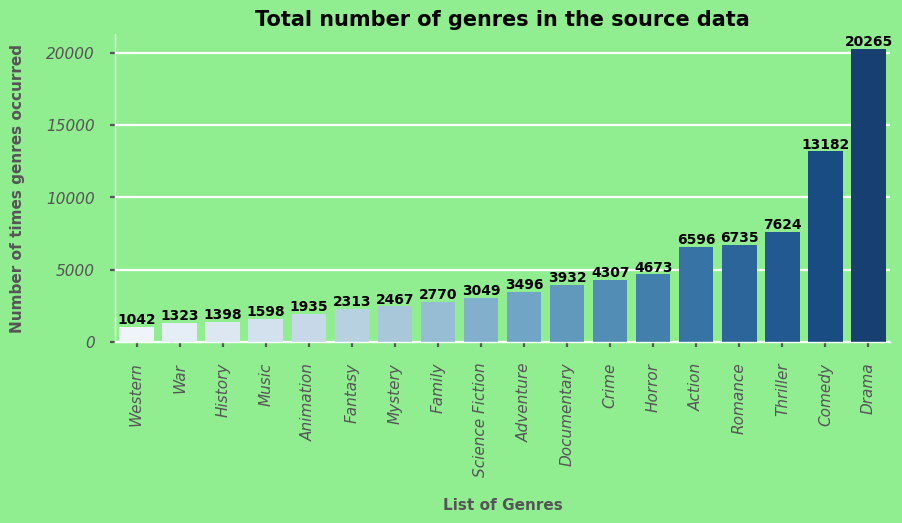

In [113]:
# Plotting the source data - to viusalise the number of genres and their count
style.use('seaborn-poster')
style.use('ggplot')

fig = plt.figure(figsize=(10, 4))
fig.patch.set_facecolor('lightgreen')

ax = fig.add_subplot(111)
ax.set_facecolor('lightgreen')
sns.barplot(x=keys, y=values, palette="Blues", ax=ax)
sns.despine(top=True)

for i, value in enumerate(values):
    ax.text(i, value + 0.8, str(value), ha='center', va='bottom', fontweight='bold')

plt.title("Total number of genres in the source data", size=15, fontweight='bold')
plt.xlabel('List of Genres', size=11, labelpad=15, fontweight='bold')
plt.ylabel('Number of times genres occurred', size=11, labelpad=15, fontweight='bold')
plt.xticks(size=11, rotation=90, style='italic')
plt.yticks(size=11, style='italic')



plt.show()

In [114]:
# Inserting the exploded genre list to the subsetted source data dataframe
subset_data['genre_list'] = genre_per_movie
subset_data.head()     

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_3694/675995725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['genre_list'] = genre_per_movie


,id,original_title,overview,tagline,genres,budget,popularity,release_date,genre_list
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,21.946943,1995-10-30,"[Animation, Comedy, Family]"
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,17.015539,1995-12-15,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,11.7129,1995-12-22,"[Romance, Comedy]"
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,3.859495,1995-12-22,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,[Comedy]


In [115]:
# filtering from the subset_data to get only the individual genres. i.e., If a movie has one plus genre - we are not considering them
subset_data_with_one_genre = subset_data.loc[subset_data['genre_list'].apply(lambda x: len(x) == 1)]
subset_data_with_one_genre.head()

,id,original_title,overview,tagline,genres,budget,popularity,release_date,genre_list
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,[Comedy]
25,16420,Othello,The evil Iago pretends to be friend of Othello...,"Envy, greed, jealousy and love.","[{'id': 18, 'name': 'Drama'}]",0,1.845899,1995-12-15,[Drama]
35,687,Dead Man Walking,A justice drama based on a true story about a ...,NaN,"[{'id': 18, 'name': 'Drama'}]",11000000,6.891317,1995-12-29,[Drama]
39,34615,"Cry, the Beloved Country",A South-African preacher goes to search for hi...,NaN,"[{'id': 18, 'name': 'Drama'}]",0,0.894647,1995-12-15,[Drama]
52,49133,Lamerica,"Fiore, an Italian conman, arrives in post Comm...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",0,1.361286,1994-01-01,[Drama]


In [116]:
# exploding the genre_list column to get the string values of genre.
subset_data_with_one_genre['genre_list'] = subset_data_with_one_genre['genre_list'].explode()
subset_data_with_one_genre

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_3694/1597825357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data_with_one_genre['genre_list'] = subset_data_with_one_genre['genre_list'].explode()


,id,original_title,overview,tagline,genres,budget,popularity,release_date,genre_list
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,Comedy
25,16420,Othello,The evil Iago pretends to be friend of Othello...,"Envy, greed, jealousy and love.","[{'id': 18, 'name': 'Drama'}]",0,1.845899,1995-12-15,Drama
35,687,Dead Man Walking,A justice drama based on a true story about a ...,NaN,"[{'id': 18, 'name': 'Drama'}]",11000000,6.891317,1995-12-29,Drama
39,34615,"Cry, the Beloved Country",A South-African preacher goes to search for hi...,NaN,"[{'id': 18, 'name': 'Drama'}]",0,0.894647,1995-12-15,Drama
52,49133,Lamerica,"Fiore, an Italian conman, arrives in post Comm...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",0,1.361286,1994-01-01,Drama
...,...,...,...,...,...,...,...,...,...
45444,44333,Les cartes vivantes,A bearded magician holds up a large playing ca...,NaN,"[{'id': 14, 'name': 'Fantasy'}]",0,0.208349,1905-01-01,Fantasy
45452,276895,Deep Hearts,"Deep Hearts is a film about the Bororo Fulani,...",NaN,"[{'id': 99, 'name': 'Documentary'}]",0,0.011025,1981-01-01,Documentary
45458,289923,The Burkittsville 7,A film archivist revisits the story of Rustin ...,"Do you know what happened 50 years before ""The...","[{'id': 27, 'name': 'Horror'}]",0,0.38645,2000-10-03,Horror
45459,222848,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,NaN,"[{'id': 878, 'name': 'Science Fiction'}]",0,0.661558,1995-01-01,Science Fiction


In [118]:
# renaming genre_list to genre_label
subset_data_with_one_genre = subset_data_with_one_genre.rename(columns={'genre_list':'genre_label'})
subset_data_with_one_genre

,id,original_title,overview,tagline,genres,budget,popularity,release_date,genre_label
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,Comedy
25,16420,Othello,The evil Iago pretends to be friend of Othello...,"Envy, greed, jealousy and love.","[{'id': 18, 'name': 'Drama'}]",0,1.845899,1995-12-15,Drama
35,687,Dead Man Walking,A justice drama based on a true story about a ...,NaN,"[{'id': 18, 'name': 'Drama'}]",11000000,6.891317,1995-12-29,Drama
39,34615,"Cry, the Beloved Country",A South-African preacher goes to search for hi...,NaN,"[{'id': 18, 'name': 'Drama'}]",0,0.894647,1995-12-15,Drama
52,49133,Lamerica,"Fiore, an Italian conman, arrives in post Comm...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",0,1.361286,1994-01-01,Drama
...,...,...,...,...,...,...,...,...,...
45444,44333,Les cartes vivantes,A bearded magician holds up a large playing ca...,NaN,"[{'id': 14, 'name': 'Fantasy'}]",0,0.208349,1905-01-01,Fantasy
45452,276895,Deep Hearts,"Deep Hearts is a film about the Bororo Fulani,...",NaN,"[{'id': 99, 'name': 'Documentary'}]",0,0.011025,1981-01-01,Documentary
45458,289923,The Burkittsville 7,A film archivist revisits the story of Rustin ...,"Do you know what happened 50 years before ""The...","[{'id': 27, 'name': 'Horror'}]",0,0.38645,2000-10-03,Horror
45459,222848,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,NaN,"[{'id': 878, 'name': 'Science Fiction'}]",0,0.661558,1995-01-01,Science Fiction


In [120]:
# getting the list of genres and their counts - for the individual genres
subset_data_with_one_genre_barPlotAxes = subset_data_with_one_genre.groupby('genre_label').size().reset_index(name='count')
subset_data_with_one_genre_barPlotAxes = subset_data_with_one_genre_barPlotAxes.sort_values('count')
subset_data_with_one_genre_barPlotAxes

,genre_label,count
9,History,16
16,War,37
8,Fantasy,51
12,Mystery,78
7,Family,107
11,Music,112
1,Adventure,114
13,Romance,128
4,Crime,137
14,Science Fiction,212


/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_3694/3385339714.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


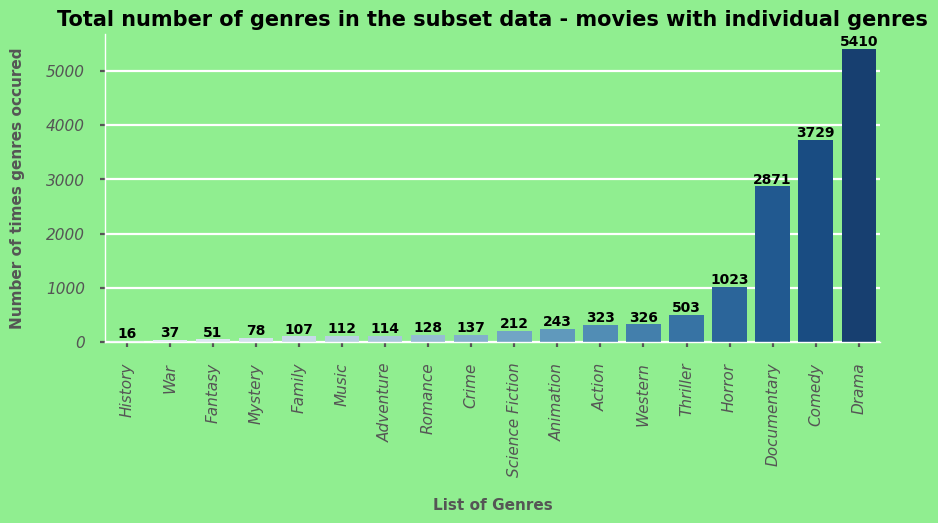

In [129]:
# Plotting the subset data - to viusalise the number of genres (individual genres) and thier count 
style.use('seaborn-poster')
style.use('ggplot')

fig = plt.figure(figsize=(10, 4))  
fig.patch.set_facecolor('lightgreen')

ax = fig.add_subplot(111)
ax.set_facecolor('lightgreen')

sns.barplot(x=subset_data_with_one_genre_barPlotAxes['genre_label'], y=subset_data_with_one_genre_barPlotAxes['count'], palette="Blues") 
sns.despine(top=True) 

for i, value in enumerate(subset_data_with_one_genre_barPlotAxes['count']):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontweight='bold')

plt.title("Total number of genres in the subset data - movies with individual genres", size=15, fontweight='bold')
plt.xlabel('List of Genres', size=11, labelpad=15, fontweight='bold')  
plt.ylabel('Number of times genres occured', size=11, labelpad=15, fontweight='bold') 
plt.xticks(size=11, rotation=90, style='italic')  
plt.yticks(size=11, style='italic')  

plt.show()  

In [132]:
empty_count = 0
for genre in genre_per_movie:
  if not len(genre):
    empty_count += 1
print("The total count of the source data is :", len(subset_data))
print("Count of total empty count in genre_label from the source data is :", empty_count) 

# Counting the non-empty genre_list for movies with one genre
subset_data_with_one_genre = subset_data_with_one_genre[subset_data_with_one_genre['genre_label'].map(lambda d: len(d)) > 0]
print("Count of 'non-empty' genre_label values for movies with one genre:", len(subset_data_with_one_genre))

The total count of the source data is : 45466
Count of total empty count in genre_label from the source data is : 2471
Count of 'non-empty' genre_label values for movies with one genre: 15420


<p style="font-size:25px; color:green; font-weight:bold;"> Using TMDb API to download the movie posters </p>

In [ ]:
!pip install tmdbv3api

from bs4 import BeautifulSoup
import os    
import requests
from tmdbv3api import Movie
from tmdbv3api import TMDb

# Instalising the TMDb API
tmdb = TMDb()
tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'

In [ ]:
# # Creating a function to download the posters 
# def get_movie_posters(url, name):
#   try:
#     baseurl = 'http://image.tmdb.org/t/p/w185'
#     link = baseurl + url
#     img = requests.get(link).content
#     name = name.replace('/', '_')
#     file_name = str(name) + ".jpg"
#     path = os.path.join('C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters', file_name)
#     with open(path, 'wb') as handler:
#       handler.write(img)
#     return path
#   except Exception as e:
#     print('[ERROR]', str(e))
#     return "Error"

# poster_paths = []
# movie = Movie()

# i = 1
# for id, name in zip(subset_data['id'].tolist(), subset_data['original_title'].tolist()):
#   m = movie.details(int(id))
#   print('Downloading:', name, "i", i)
#   try:
#     poster_paths.append(get_movie_posters(m.poster_path, name))
#   except Exception as e:
#     print('[ERROR]', str(e))
#     poster_paths.append("API Error")
#   i += 1

# print(len(poster_paths))    

In [ ]:


# import os
# from tmdbv3api import TMDb, Movie

# # Function to download posters (dummy implementation)
# def get_posters(base_url, poster_path, name):
#     import requests
#     temp = name.replace('/', '_')
#     file_name = f"{temp}.jpg"
#     path = os.path.join(download_path, file_name)
    
#     if os.path.exists(path):
#         return path  # Skip download if file already exists

#     full_url = base_url + poster_path
#     response = requests.get(full_url)
#     if response.status_code == 200:
#         with open(path, 'wb') as f:
#             f.write(response.content)
#         return path
#     else:
#         raise Exception(f"Failed to download poster for {name}")

# # Initialize TMDb and Movie objects
# tmdb = TMDb()
# tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'
# movie = Movie()

# # Base URL for TMDb images
# base_url = "http://image.tmdb.org/t/p/original"

# Track existing downloaded files
# download_path = 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters'
# downloaded_files = {name.replace('/', '_') + ".jpg" for name in os.listdir(download_path)}

# poster_paths = []

# i = 1
# for id, name in zip(subset_data['id'].tolist(), subset_data['original_title'].tolist()):
#     temp = name.replace('/', '_')
#     file_name = f"{temp}.jpg"

#     if file_name in downloaded_files:
#         print(f"Skipping {name}, already downloaded.")
#         poster_paths.append(os.path.join(download_path, file_name))
#         continue

#     try:
#         m = movie.details(int(id))
#         print('Downloading:', name, "i", i)
#         poster_path = get_posters(base_url, m.poster_path, name)
#         poster_paths.append(poster_path)
#     except Exception as e:
#         error_message = str(e)
#         if "The resource you requested could not be found" in error_message:
#             print('[TMDb ERROR]', error_message)
#             poster_paths.append("TMDb Error")
#         else:
#             print('[ERROR]', error_message)
#             poster_paths.append("API Error")

#     i += 1
# print(len(poster_paths))


In [183]:
# creating a non-empty overview subset df of movies with one genres
subset_data_with_one_genre_nonNullOverview = subset_data_with_one_genre.loc[~(subset_data_with_one_genre['overview'].isna())]
subset_data_with_one_genre_nonNullOverview

,id,original_title,overview,tagline,genres,budget,popularity,release_date,genre_label
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,Comedy
25,16420,Othello,The evil Iago pretends to be friend of Othello...,"Envy, greed, jealousy and love.","[{'id': 18, 'name': 'Drama'}]",0,1.845899,1995-12-15,Drama
35,687,Dead Man Walking,A justice drama based on a true story about a ...,NaN,"[{'id': 18, 'name': 'Drama'}]",11000000,6.891317,1995-12-29,Drama
39,34615,"Cry, the Beloved Country",A South-African preacher goes to search for hi...,NaN,"[{'id': 18, 'name': 'Drama'}]",0,0.894647,1995-12-15,Drama
52,49133,Lamerica,"Fiore, an Italian conman, arrives in post Comm...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",0,1.361286,1994-01-01,Drama
...,...,...,...,...,...,...,...,...,...
45444,44333,Les cartes vivantes,A bearded magician holds up a large playing ca...,NaN,"[{'id': 14, 'name': 'Fantasy'}]",0,0.208349,1905-01-01,Fantasy
45452,276895,Deep Hearts,"Deep Hearts is a film about the Bororo Fulani,...",NaN,"[{'id': 99, 'name': 'Documentary'}]",0,0.011025,1981-01-01,Documentary
45458,289923,The Burkittsville 7,A film archivist revisits the story of Rustin ...,"Do you know what happened 50 years before ""The...","[{'id': 27, 'name': 'Horror'}]",0,0.38645,2000-10-03,Horror
45459,222848,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,NaN,"[{'id': 878, 'name': 'Science Fiction'}]",0,0.661558,1995-01-01,Science Fiction


In [184]:
# API to downlaod posters

import os
from tmdbv3api import TMDb, Movie
import requests

# Function to download posters
def get_posters(base_url, poster_path, name, download_path):
    temp = name.replace('/', '_')
    file_name = f"{temp}.jpg"
    path = os.path.join(download_path, file_name)
    
    if os.path.exists(path):
        return None  # Return None if the file already exists

    full_url = base_url + poster_path
    response = requests.get(full_url)
    if response.status_code == 200:
        with open(path, 'wb') as f:
            f.write(response.content)
        return path
    else:
        raise Exception(f"Failed to download poster for {name}")

# Initializing TMDb and Movie objects
tmdb = TMDb()
tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'
movie = Movie()

# Base URL for TMDb images
base_url = "http://image.tmdb.org/t/p/original"

# Path to the directory where posters will be downloaded
download_path = '/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters_oneGenre'

# Track existing downloaded files
downloaded_files = {file_name for file_name in os.listdir(download_path)}

poster_paths = []

i = 1
for id, name in zip(subset_data_with_one_genre_nonNullOverview['id'].tolist(), subset_data_with_one_genre_nonNullOverview['original_title'].tolist()):
    temp = name.replace('/', '_')
    file_name = f"{temp}.jpg"

    if file_name not in downloaded_files:
        # print(f"Skipping {name}, already downloaded.")
        # continue  # Skip downloading if already downloaded

        try:
            m = movie.details(int(id))
            print('Downloading:', name, "i", i)
            poster_path = get_posters(base_url, m.poster_path, name, download_path)
            if poster_path:  # Only add to poster_paths if the poster was successfully downloaded
                poster_paths.append(poster_path)
                downloaded_files.add(file_name)  # Add newly downloaded file to the set
        except Exception as e:
            error_message = str(e)
            if "The resource you requested could not be found" in error_message:
                print('[TMDb ERROR]', error_message)
            else:
                print('[ERROR]', error_message)

    i += 1
print(len(poster_paths))

Downloading: Father of the Bride Part II i 1
Downloading: Othello i 2
Downloading: Dead Man Walking i 3
Downloading: Cry, the Beloved Country i 4
Downloading: Lamerica i 5
Downloading: Georgia i 6
Downloading: Don't Be a Menace to South Central While Drinking Your Juice in the Hood i 7
Downloading: Bio-Dome i 8
Downloading: Friday i 9
Downloading: Nico Icon i 10
Downloading: Black Sheep i 11
Downloading: The Journey of August King i 12
Downloading: A Midwinter's Tale i 13
Downloading: La Haine i 14
Downloading: Heidi Fleiss: Hollywood Madam i 15
Downloading: Happy Gilmore i 16
Downloading: Catwalk i 17
Downloading: Headless Body in Topless Bar i 18
Downloading: Margaret's Museum i 19
Downloading: Le Bonheur est dans le pré i 20
Downloading: The Boys of St. Vincent i 21
Downloading: The NeverEnding Story III i 22
Downloading: صمت القصور i 23
Downloading: Down Periscope i 24
Downloading: From the Journals of Jean Seberg i 25
Downloading: Man of the Year i 26
Downloading: The Neon Bible i

In [189]:
# Importing all the downloaded images
image_downloaded_path = '/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters_oneGenre'
poster_paths = [os.path.join(image_downloaded_path, f) for f in os.listdir(image_downloaded_path)]

In [194]:
# Path to the directory where posters are downloaded
download_path = '/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters_oneGenre'
downloaded_files = {file_name for file_name in os.listdir(download_path)}
poster_paths = [None] * len(subset_data_with_one_genre_nonNullOverview)

# Filling in poster_paths with the correct paths - hotfix
for idx, name in enumerate(subset_data_with_one_genre_nonNullOverview['original_title'].tolist()):
    temp = name.replace('/', '_')
    file_name = f"{temp}.jpg"
    path = os.path.join(download_path, file_name)
    
    if file_name in downloaded_files:
        poster_paths[idx] = path  
    else:
        poster_paths[idx] = None   

# Checking if lengths match before assignment
if len(poster_paths) == len(subset_data_with_one_genre_nonNullOverview):
    subset_data_with_one_genre_nonNullOverview['poster_paths'] = poster_paths
else:
    raise ValueError(f"Length of poster_paths ({len(poster_paths)}) does not match length of DataFrame ({len(subset_data_with_one_genre_nonNullOverview)})")

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_3694/2502979386.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data_with_one_genre_nonNullOverview['poster_paths'] = poster_paths


In [190]:
print('Count of movies with one genre and non empty overview' ,len(subset_data_with_one_genre_nonNullOverview))

Count of movies with one genre and non empty overview 14986


In [196]:
len(poster_paths)

14986

In [197]:
subset_data_with_one_genre_nonNullOverview

,id,original_title,overview,tagline,genres,budget,popularity,release_date,genre_label,poster_paths
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,Comedy,/Users/ajayrahulraja/Library/CloudStorage/OneD...
25,16420,Othello,The evil Iago pretends to be friend of Othello...,"Envy, greed, jealousy and love.","[{'id': 18, 'name': 'Drama'}]",0,1.845899,1995-12-15,Drama,/Users/ajayrahulraja/Library/CloudStorage/OneD...
35,687,Dead Man Walking,A justice drama based on a true story about a ...,NaN,"[{'id': 18, 'name': 'Drama'}]",11000000,6.891317,1995-12-29,Drama,/Users/ajayrahulraja/Library/CloudStorage/OneD...
39,34615,"Cry, the Beloved Country",A South-African preacher goes to search for hi...,NaN,"[{'id': 18, 'name': 'Drama'}]",0,0.894647,1995-12-15,Drama,/Users/ajayrahulraja/Library/CloudStorage/OneD...
52,49133,Lamerica,"Fiore, an Italian conman, arrives in post Comm...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",0,1.361286,1994-01-01,Drama,/Users/ajayrahulraja/Library/CloudStorage/OneD...
...,...,...,...,...,...,...,...,...,...,...
45444,44333,Les cartes vivantes,A bearded magician holds up a large playing ca...,NaN,"[{'id': 14, 'name': 'Fantasy'}]",0,0.208349,1905-01-01,Fantasy,/Users/ajayrahulraja/Library/CloudStorage/OneD...
45452,276895,Deep Hearts,"Deep Hearts is a film about the Bororo Fulani,...",NaN,"[{'id': 99, 'name': 'Documentary'}]",0,0.011025,1981-01-01,Documentary,None
45458,289923,The Burkittsville 7,A film archivist revisits the story of Rustin ...,"Do you know what happened 50 years before ""The...","[{'id': 27, 'name': 'Horror'}]",0,0.38645,2000-10-03,Horror,/Users/ajayrahulraja/Library/CloudStorage/OneD...
45459,222848,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,NaN,"[{'id': 878, 'name': 'Science Fiction'}]",0,0.661558,1995-01-01,Science Fiction,/Users/ajayrahulraja/Library/CloudStorage/OneD...


In [199]:
# Filtering out the poster paths that are empty
subset_data_with_one_genre_nonNullOverview = subset_data_with_one_genre_nonNullOverview.loc[~(subset_data_with_one_genre_nonNullOverview['poster_paths'].isna())]
print('Count of movies with one genre and non empty overview, poster path' ,len(subset_data_with_one_genre_nonNullOverview))

Count of movies with one genre and non empty overview, poster path 14561


In [205]:
# Filtering out the poster paths which are not downaloaded because of API Error
subset_data_with_one_genre_nonNullOverview = subset_data_with_one_genre_nonNullOverview[subset_data_with_one_genre_nonNullOverview['poster_paths'] != "API Error"]

# Filtering out the poster paths which are not downaloaded because of Error
subset_data_with_one_genre_nonNullOverview = subset_data_with_one_genre_nonNullOverview[subset_data_with_one_genre_nonNullOverview['poster_paths'] != "Error"]

# Filtering out the poster paths which are not downaloaded because of None
subset_data_with_one_genre_nonNullOverview = subset_data_with_one_genre_nonNullOverview[(subset_data_with_one_genre_nonNullOverview['poster_paths'] != None) | \
    (subset_data_with_one_genre_nonNullOverview['poster_paths'] != "None")]

# Filtering out the poster paths that are empty
subset_data_with_one_genre_nonNull_features = subset_data_with_one_genre_nonNullOverview.loc[~(subset_data_with_one_genre_nonNullOverview['poster_paths'].isna())]
print('Count of movies with one genre and non empty overview, poster path' ,len(subset_data_with_one_genre_nonNull_features))

Count of movies with one genre and non empty overview, poster path 14561


In [206]:
subset_data_with_one_genre_nonNull_features.to_csv('/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/dataset_with_oneGenre_nonNull_features.csv')

Reading the saved individual genres for a movie

In [3]:
import pandas as pd
data_with_genreAndPosters = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/dataset_with_oneGenre_nonNull_features.csv")

In [4]:
data_with_genreAndPosters

,Unnamed: 0,id,original_title,overview,tagline,genres,budget,popularity,release_date,genre_label,poster_paths
0,4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,Comedy,/Users/ajayrahulraja/Library/CloudStorage/OneD...
1,25,16420,Othello,The evil Iago pretends to be friend of Othello...,"Envy, greed, jealousy and love.","[{'id': 18, 'name': 'Drama'}]",0,1.845899,1995-12-15,Drama,/Users/ajayrahulraja/Library/CloudStorage/OneD...
2,35,687,Dead Man Walking,A justice drama based on a true story about a ...,NaN,"[{'id': 18, 'name': 'Drama'}]",11000000,6.891317,1995-12-29,Drama,/Users/ajayrahulraja/Library/CloudStorage/OneD...
3,39,34615,"Cry, the Beloved Country",A South-African preacher goes to search for hi...,NaN,"[{'id': 18, 'name': 'Drama'}]",0,0.894647,1995-12-15,Drama,/Users/ajayrahulraja/Library/CloudStorage/OneD...
4,52,49133,Lamerica,"Fiore, an Italian conman, arrives in post Comm...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",0,1.361286,1994-01-01,Drama,/Users/ajayrahulraja/Library/CloudStorage/OneD...
...,...,...,...,...,...,...,...,...,...,...,...
14556,45441,14008,Cadet Kelly,Hyperactive teenager Kelly is enrolled into a ...,Too Cool For The Rules!,"[{'id': 35, 'name': 'Comedy'}]",0,4.392389,2002-03-07,Comedy,/Users/ajayrahulraja/Library/CloudStorage/OneD...
14557,45444,44333,Les cartes vivantes,A bearded magician holds up a large playing ca...,NaN,"[{'id': 14, 'name': 'Fantasy'}]",0,0.208349,1905-01-01,Fantasy,/Users/ajayrahulraja/Library/CloudStorage/OneD...
14558,45458,289923,The Burkittsville 7,A film archivist revisits the story of Rustin ...,"Do you know what happened 50 years before ""The...","[{'id': 27, 'name': 'Horror'}]",0,0.386450,2000-10-03,Horror,/Users/ajayrahulraja/Library/CloudStorage/OneD...
14559,45459,222848,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,NaN,"[{'id': 878, 'name': 'Science Fiction'}]",0,0.661558,1995-01-01,Science Fiction,/Users/ajayrahulraja/Library/CloudStorage/OneD...


In [6]:
# subsetting the df with required columns

# this will be the final dataset to train the model

data_with_genreAndPosters_subset = data_with_genreAndPosters[['id', 'original_title', 'overview', 'genres', 'genre_label', 'poster_paths']]
data_with_genreAndPosters_subset

,id,original_title,overview,genres,genre_label,poster_paths
0,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",Comedy,/Users/ajayrahulraja/Library/CloudStorage/OneD...
1,16420,Othello,The evil Iago pretends to be friend of Othello...,"[{'id': 18, 'name': 'Drama'}]",Drama,/Users/ajayrahulraja/Library/CloudStorage/OneD...
2,687,Dead Man Walking,A justice drama based on a true story about a ...,"[{'id': 18, 'name': 'Drama'}]",Drama,/Users/ajayrahulraja/Library/CloudStorage/OneD...
3,34615,"Cry, the Beloved Country",A South-African preacher goes to search for hi...,"[{'id': 18, 'name': 'Drama'}]",Drama,/Users/ajayrahulraja/Library/CloudStorage/OneD...
4,49133,Lamerica,"Fiore, an Italian conman, arrives in post Comm...","[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",Drama,/Users/ajayrahulraja/Library/CloudStorage/OneD...
...,...,...,...,...,...,...
14556,14008,Cadet Kelly,Hyperactive teenager Kelly is enrolled into a ...,"[{'id': 35, 'name': 'Comedy'}]",Comedy,/Users/ajayrahulraja/Library/CloudStorage/OneD...
14557,44333,Les cartes vivantes,A bearded magician holds up a large playing ca...,"[{'id': 14, 'name': 'Fantasy'}]",Fantasy,/Users/ajayrahulraja/Library/CloudStorage/OneD...
14558,289923,The Burkittsville 7,A film archivist revisits the story of Rustin ...,"[{'id': 27, 'name': 'Horror'}]",Horror,/Users/ajayrahulraja/Library/CloudStorage/OneD...
14559,222848,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,"[{'id': 878, 'name': 'Science Fiction'}]",Science Fiction,/Users/ajayrahulraja/Library/CloudStorage/OneD...


Getting 80-20 train and test

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_with_genreAndPosters_subset, test_size=0.2)
train, val = train_test_split(train, test_size=0.1)
print(type(train), type(test), type(val))

val.to_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/val_data.csv")
test.to_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/test_data.csv")
train.to_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/train_data.csv")

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [218]:
import cv2
import numpy as np  
import pandas as pd
from PIL import Image 

# function to resize to the image for ViT
def poster_resize(path):
  try:
    image = cv2.imread(path)
    image = cv2.resize(image, (75, 115))
    image = image.astype(np.float32)/255
    return image
  except Exception as e:
    print(str(e))
    return None

In [219]:
# Reading the val, train and test
val = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/val_data.csv")
test = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/test_data.csv")
train = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/train_data.csv")

Val - creating a csv and normalised images

In [220]:
val_imgs = []
i = 0
for index, row in val.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['poster_paths']))
  img = poster_resize(str(row['poster_paths']))
  if img is not None:
    val_imgs.append(img)
  else:
    val = val.drop(index)
    print("Dropping row:", index, "Length:", len(val))
  i += 1

Processing i: 0 /Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters_oneGenre/After Innocence.jpg
Processing i: 100 /Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters_oneGenre/Mooz-lum.jpg
Processing i: 200 /Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters_oneGenre/The Moonlighter.jpg
Processing i: 300 /Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters_oneGenre/Narco.jpg
Processing i: 400 /Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Datas

In [221]:
assert len(val) == len(val_imgs)

In [222]:
val_np_imgs = np.array(val_imgs)
val_np_imgs.shape

(1164, 115, 75, 3)

In [223]:
val.to_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code//val_data.csv")

In [224]:
import pickle
with open('/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/val_np_img_norm','wb') as f: pickle.dump(val_np_imgs, f)

Test - creating a csv and normalised images

In [225]:
test_imgs = []
i = 0
for index, row in test.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['poster_paths']))
  img = poster_resize(str(row['poster_paths']))
  if img is not None:
    test_imgs.append(img)
  else:
    test = test.drop(index)
    print("Dropping row:", index, "Length:", len(test))
  i += 1

Processing i: 0 /Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters_oneGenre/Mademoiselle C.jpg
Processing i: 100 /Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters_oneGenre/Macbeth.jpg
Processing i: 200 /Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters_oneGenre/This Earth Is Mine.jpg
Processing i: 300 /Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters_oneGenre/Lille soldat.jpg
Processing i: 400 /Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_proje

In [226]:
assert len(test) == len(test_imgs)

In [227]:
test_np_imgs = np.array(test_imgs)
test_np_imgs.shape

# (3006, 115, 75, 3)

(2913, 115, 75, 3)

In [228]:
test.to_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/test_data.csv")

In [229]:
import pickle
with open('/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/test_np_imgs_norm','wb') as f: pickle.dump(test_np_imgs, f)

Train - creating a csv and normalised images

In [230]:
train_imgs = []
i = 0
for index, row in train.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['poster_paths']))
  img = poster_resize(str(row['poster_paths']))
  if img is not None:
    train_imgs.append(img)
  else:
    train = train.drop(index)
    print("Dropping row:", index, "Length:", len(train))
  i += 1

Processing i: 0 /Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters_oneGenre/As I Lay Dying.jpg
Processing i: 100 /Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters_oneGenre/In Memorium.jpg
Processing i: 200 /Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters_oneGenre/Big Ass Spider!.jpg
Processing i: 300 /Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters_oneGenre/Συγχαρητήρια Στους Αισιόδοξους?.jpg
Processing i: 400 /Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Projec

In [231]:
assert len(train) == len(train_imgs)

In [232]:
train_np_imgs = np.array(train_imgs)
train_np_imgs.shape

(10481, 115, 75, 3)

In [233]:
train.to_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/train_data.csv")

In [234]:
import pickle
with open('/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/train_np_imgs_norm','wb') as f: pickle.dump(train_np_imgs, f)

Downloading the images again for Val - in case not downloaded already

In [16]:
import os
from tmdbv3api import TMDb, Movie
import requests

# Function to download posters
def get_posters(base_url, poster_path, name, download_path):
    temp = name.replace('/', '_')
    file_name = f"{temp}.jpg"
    path = os.path.join(download_path, file_name)
    
    if os.path.exists(path):
        return None  # Return None if the file already exists

    full_url = base_url + poster_path
    response = requests.get(full_url)
    if response.status_code == 200:
        with open(path, 'wb') as f:
            f.write(response.content)
        return path
    else:
        raise Exception(f"Failed to download poster for {name}")

# Initialize TMDb and Movie objects
tmdb = TMDb()
tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'
movie = Movie()

# Base URL for TMDb images
base_url = "http://image.tmdb.org/t/p/original"

# Path to the directory where posters will be downloaded
download_path = '/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_poster_valDf'

# Track existing downloaded files
downloaded_files = {file_name for file_name in os.listdir(download_path)}

poster_paths = []

i = 1
for id, name in zip(val['id'].tolist(), val['original_title'].tolist()):
    temp = name.replace('/', '_')
    file_name = f"{temp}.jpg"

    if file_name not in downloaded_files:
        # print(f"Skipping {name}, already downloaded.")
        # continue  # Skip downloading if already downloaded

        try:
            m = movie.details(int(id))
            print('Downloading:', name, "i", i)
            poster_path = get_posters(base_url, m.poster_path, name, download_path)
            if poster_path:  # Only add to poster_paths if the poster was successfully downloaded
                poster_paths.append(poster_path)
                downloaded_files.add(file_name)  # Add newly downloaded file to the set
        except Exception as e:
            error_message = str(e)
            if "The resource you requested could not be found" in error_message:
                print('[TMDb ERROR]', error_message)
            else:
                print('[ERROR]', error_message)

    i += 1
print(len(poster_paths))

Downloading: Rolf i 1
Downloading: Trekkies i 2
Downloading: Find Me i 3
Downloading: Änglagård i 4
Downloading: Winter on Fire: Ukraine's Fight for Freedom i 5
Downloading: Raised by Wolves i 6
Downloading: The Macomber Affair i 7
Downloading: Angyali üdvözlet i 8
Downloading: Memoria de Mis Putas Tristes i 9
Downloading: To Sir, with Love i 10
Downloading: El año del tigre i 11
Downloading: Getting Away with Murder i 12
Downloading: The Kite Runner i 13
Downloading: Blood Brother i 14
Downloading: Mangue Negro i 15
Downloading: See What I'm Saying: The Deaf Entertainers Documentary i 16
Downloading: 天注定 i 17
Downloading: Van Wilder 2: The Rise of Taj i 18
Downloading: Mask Maker i 19
Downloading: Lana Turner... a Daughter's Memoir i 20
Downloading: Le Gendarme à New York i 21
Downloading: Stop the Pounding Heart i 22
Downloading: Sódóma Reykjavík i 23
Downloading: Radin! i 24
Downloading: Ma saison préférée i 25
Downloading: How to Beat the High Co$t of Living i 26
Downloading: Sicci

Training the model

In [24]:
# cleaning the text before embedding and training
def text_cleaning(text):
    text = text.lower()
    text = re.sub(r'-', ' ', text)
    text = re.sub(r'[^\w\s\.!?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [25]:
import os
import re
import pandas as pd
import numpy as np
import pickle
from transformers import ViTModel, ViTImageProcessor, BertTokenizer, BertModel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from PIL import Image

# Loading preprocessed data
val = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/val_data.csv")
test = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/test_data.csv")
train = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/train_data.csv")

# textual feature of train, test and val are being cleaned
train['cleaned_overview'] = train['overview'].apply(text_cleaning)
test['cleaned_overview'] = test['overview'].apply(text_cleaning)
val['cleaned_overview'] = val['overview'].apply(text_cleaning)

# Initializing models
vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
vit_processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

/Users/ajayrahulraja/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be 

In [3]:
test.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'original_title', 'overview',
       'genres', 'genre_label', 'poster_paths', 'cleaned_overview'],
      dtype='object')

In [4]:
train.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'original_title', 'overview',
       'genres', 'genre_label', 'poster_paths', 'cleaned_overview'],
      dtype='object')

In [6]:
import numpy as np
from PIL import Image
from transformers import ViTModel, ViTFeatureExtractor, BertTokenizer, BertModel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load and resize image function
def resize_image(img_path):
    try:
        img = Image.open(img_path).convert("RGB")
        img = img.resize((224, 224))
        return np.array(img)
    except Exception as e:
        print(f"Error with image {img_path}: {e}")
        return None

# Function to extract visual features using ViT
def get_vit_features(image_list, model, processor):
    feature_list = []
    for img_path in image_list:
        img = resize_image(img_path)
        if img is None:
            continue
        inputs = processor(images=img, return_tensors="pt")
        outputs = model(**inputs)
        features = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        feature_list.append(features)
        print(f"Extracted feature shape: {features.shape}")
    if feature_list:
        return np.vstack(feature_list)
    else:
        return np.array([])

# Function to extract textual features using BERT
def get_bert_features(text_list, tokenizer, model):
    feature_list = []
    for text in text_list:
        if not isinstance(text, str):
            print(f"Invalid text: {text}")
            continue
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        outputs = model(**inputs)
        features = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        feature_list.append(features)
    if feature_list:
        return np.vstack(feature_list)
    else:
        return np.array([])

# Extract visual features from train and test sets
vit_features_train = get_vit_features(train['poster_paths'].tolist(), vit_model, vit_processor)
vit_features_test = get_vit_features(test['poster_paths'].tolist(), vit_model, vit_processor)

# Extract textual features from train and test sets
bert_features_train = get_bert_features(train['cleaned_overview'].tolist(), bert_tokenizer, bert_model)
bert_features_test = get_bert_features(test['cleaned_overview'].tolist(), bert_tokenizer, bert_model)

print(f'ViT features (train): {vit_features_train.shape}')
print(f'ViT features (test): {vit_features_test.shape}')
print(f'BERT features (train): {bert_features_train.shape}')
print(f'BERT features (test): {bert_features_test.shape}')

# Combine features if they are available
if vit_features_train.size > 0 and bert_features_train.size > 0:
    X_train = np.hstack((vit_features_train, bert_features_train))
    X_test = np.hstack((vit_features_test, bert_features_test))
else:
    X_train = np.array([])
    X_test = np.array([])

# Check for genre labels and train classifier
if 'genre_label' in train.columns and 'genre_label' in test.columns:
    y_train = train['genre_label']
    y_test = test['genre_label']

    if X_train.size > 0 and X_test.size > 0:
        classifier = SVC()
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy}')

        # Save predictions
        test['predicted_genre'] = y_pred
    else:
        print("No data available for training/testing after feature extraction.")
else:
    print("Genre labels not found in the provided data.")


Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feat

In [7]:
print('The total number of records in test: ', len(test))
test_subset = test[['id', 'original_title', 'genre_label', 'predicted_genre']]
test_subset.loc[test_subset['genre_label'] != test_subset['predicted_genre']]

The total number of records in test:  2913


,id,original_title,genre_label,predicted_genre
4,125666,Killer Shark,Adventure,Comedy
5,128061,De ontmaagding van Eva van End,Drama,Comedy
6,252096,Jäähyväiset presidentille,Action,Comedy
7,50674,The Lost Future,Adventure,Science Fiction
8,41486,子連れ狼 地獄へ行くぞ!大五郎,Action,Drama
...,...,...,...,...
2896,10372,Ewoks: The Battle for Endor,Adventure,Horror
2898,42081,Zuckerbaby,Comedy,Drama
2900,153774,Il futuro,Drama,Horror
2901,344906,The Last Heist,Action,Thriller


In [ ]:
test_subset.loc[test_subset['genre_label'] == test_subset['predicted_genre']]

,id,original_title,genre_label,predicted_genre
0,206289,Mademoiselle C,Documentary,Documentary
1,462026,Edith Walks,Documentary,Documentary
2,8416,Il conformista,Drama,Drama
3,47184,めし,Drama,Drama
9,40800,Alligator 2 - The Mutation,Horror,Horror
...,...,...,...,...
2907,185744,Amy Schumer: Mostly Sex Stuff,Comedy,Comedy
2908,411656,Tonio,Drama,Drama
2909,18072,Pure,Drama,Drama
2910,54178,獨臂刀,Action,Action


In [11]:
X_train
np.savetxt('/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/X_train.txt', X_train)

In [12]:
X_test
np.savetxt('/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/X_test.txt', X_test)

In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduced parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],  # Reduced range
    'max_depth': [None, 10, 20],  # Reduced range
    'min_samples_split': [2, 5]  # Reduced options
}

# Initializing GridSearchCV with RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=2, cv=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")

# Prediction using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculating and printing various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Cross-validation scores for robustness
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=2, scoring='accuracy', n_jobs=-1)
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=  26.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  27.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  27.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=  28.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  19.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  19.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=  51.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=  52.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  53.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  53.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  18.5s
[CV] END max_depth=10, min_sampl

/Users/ajayrahulraja/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ajayrahulraja/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ajayrahulraja/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ajayrahulr

Accuracy: 0.6261585993820803
Precision: 0.5982573835689668
Recall: 0.6261585993820803
F1 Score: 0.5699923582942121
                 precision    recall  f1-score   support

         Action       1.00      0.01      0.03        73
      Adventure       0.00      0.00      0.00        25
      Animation       0.00      0.00      0.00        49
         Comedy       0.65      0.62      0.63       653
          Crime       0.00      0.00      0.00        22
    Documentary       0.75      0.80      0.77       536
          Drama       0.56      0.88      0.69      1020
         Family       0.00      0.00      0.00        16
        Fantasy       0.00      0.00      0.00         9
        History       0.00      0.00      0.00         5
         Horror       0.74      0.33      0.46       211
          Music       0.00      0.00      0.00        22
        Mystery       0.00      0.00      0.00        21
        Romance       0.00      0.00      0.00        29
Science Fiction       1.00   

In [16]:
# The above accuracy is improved in the 'training_model.ipynb'